In this notebook we will look at some $x$ and $y$ values and fit them to different functions using python. We will use the python modules numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we will input some demonstration data into two numpy arrays. We will imagine that $x$ some variable that we controle, and $y$ is variable that we meassure with some accuracy.

In [2]:
x = np.array([1,   2,  5,  10,  20,   50,   100])
y = np.array([3.1, 11, 78, 289, 1120, 8110, 30200])
print("x =",x)
print("y =",y)

x = [  1   2   5  10  20  50 100]
y = [3.10e+00 1.10e+01 7.80e+01 2.89e+02 1.12e+03 8.11e+03 3.02e+04]


and make a plot of the data.

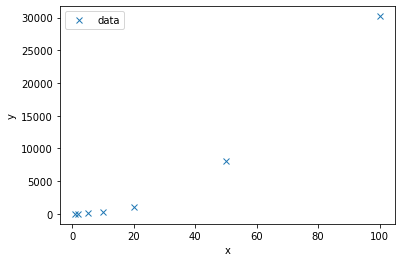

In [3]:
plt.plot(x,y,'x',label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

First we will fit the data to a streight, i.e. a first degree polynomial: 
$$
y=ax+b.
$$ 
The numpy function polyfit can be used for this.

Best fit to a streight line: y = 298.463267*x + (-2328.570612)


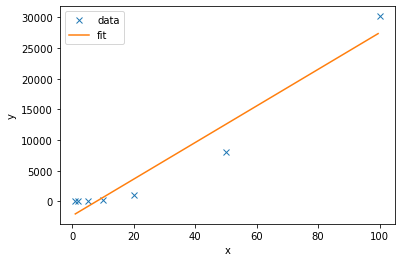

In [4]:
# Fit a first degree polynomial
p = np.polyfit(x, y, 1)

# Print the result
a=p[0]  # Slope
b=p[1]  # Intersection at x=0
print("Best fit to a streight line: y = %f*x + (%f)" % (a,b))

# Plot the fit
xfit = np.arange(1, 100, 0.5)
yfit = np.polyval(p, xfit)
plt.plot(x,y,'x',label="data")
plt.plot(xfit, yfit, '-', label="fit")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

This fit does not look very convinsing. Let try to see if the data fit a power-law model:
$$
y = bx^a
$$
If we take the logarithm on both sides we get
$$ \log(y) = \log(bx^a) $$
$$ \log(y) = \log(b)+\log(x^a) $$
$$ \log(y) = \log(b)+a\log(x) $$
$$ \log(y) = a\log(x)+\log(b) $$
$$ Y = aX+B $$
where $Y=\log(y)$, $X=\log(x)$ and $B=\log(b)$. Thus, if we plot $Y=\log(y)$ agains $X=\log(x)$ we expect to find a streight line. We note that "the slope in a log-log plot" is the exponent $a$.

Best fit to a powerlaw: y = 2.931245*x^2.007804


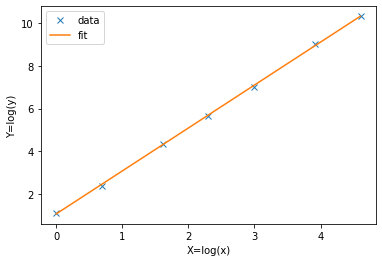

In [5]:
# Define new variables
X = np.log(x)
Y = np.log(y)

# Fit a first degree polynomial
p = np.polyfit(X, Y, 1)
a=p[0]  # Exponent of powerlaw
B=p[1]  # Logarithm of prefactor
b=np.exp(B)  # Prefactor
# Print the result

print("Best fit to a powerlaw: y = %f*x^%f" % (b,a))

# Plot the fit
Xfit = np.arange(0, np.log(100), 0.1)
Yfit = np.polyval(p, Xfit)
plt.plot(X,Y,'x',label="data")
plt.plot(Xfit, Yfit, '-', label="fit")
plt.legend()
plt.xlabel("X=log(x)")
plt.ylabel("Y=log(y)")
plt.show()

The fit to power-law model, $bx^a$, is much better than the model for the steight line. The exponent is suspiciously close to 2, and the prefactor is close to 3. Thus, our analysis suggest that the best model to describe the data is
$$
y = 3x^2.
$$